In [1]:
# Importação de bibliotecas 

import numpy as np 
import pandas as pd 

import os

In [2]:
# Verificação dos arquivos disponíveis

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/competitions/titanic/train.csv
/kaggle/input/competitions/titanic/test.csv
/kaggle/input/competitions/titanic/gender_submission.csv


In [3]:
# Carregamento dos dados train e test

train_data = pd.read_csv("/kaggle/input/competitions/titanic/train.csv")
test_data = pd.read_csv("/kaggle/input/competitions/titanic/test.csv")

In [4]:
# Visualização inicial dos dados (train)

train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Visualização inicial dos dados (test)

test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
# Importação das bibliotecas de visualização

import matplotlib.pyplot as plt
import seaborn as sns

# Configuração de estilo
sns.set(style="whitegrid")

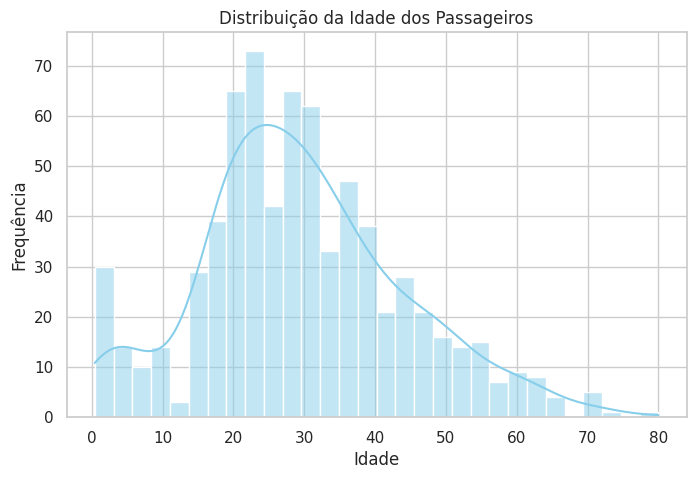

In [7]:
# Explorando as distribuições

# Gráfico de Distribuição: Idade

plt.figure(figsize=(8,5))
sns.histplot(train_data['Age'].dropna(), bins=30, kde=True, color="skyblue")
plt.title("Distribuição da Idade dos Passageiros")
plt.xlabel("Idade")
plt.ylabel("Frequência")
plt.show()

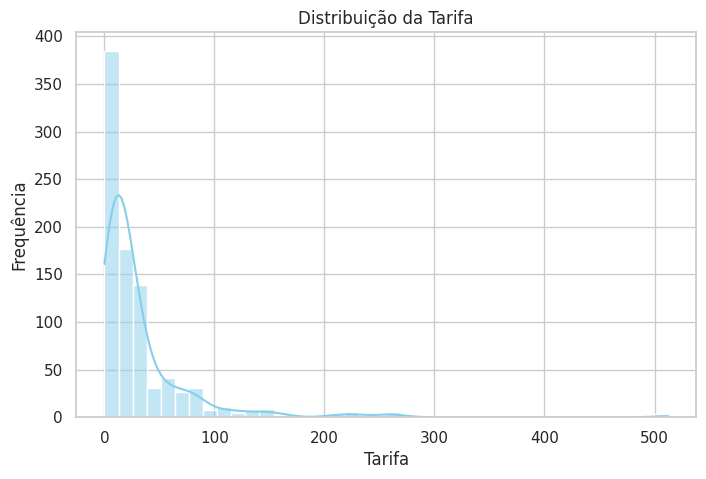

In [8]:
# Gráfico de Distribuição: Tarifa

plt.figure(figsize=(8,5))
sns.histplot(train_data['Fare'], bins=40, kde=True, color="skyblue")
plt.title("Distribuição da Tarifa")
plt.xlabel("Tarifa")
plt.ylabel("Frequência")
plt.show()

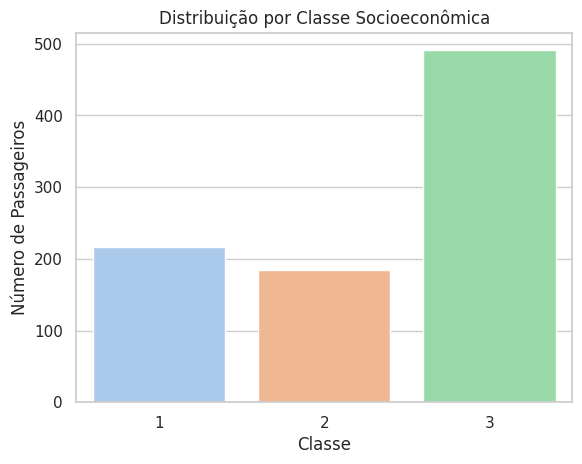

In [9]:
# Gráfico de Distribuição: Classe Socioeconômica

sns.countplot(x='Pclass', data=train_data, hue='Pclass', palette="pastel", legend=False)
plt.title("Distribuição por Classe Socioeconômica")
plt.xlabel("Classe")
plt.ylabel("Número de Passageiros")
plt.show()

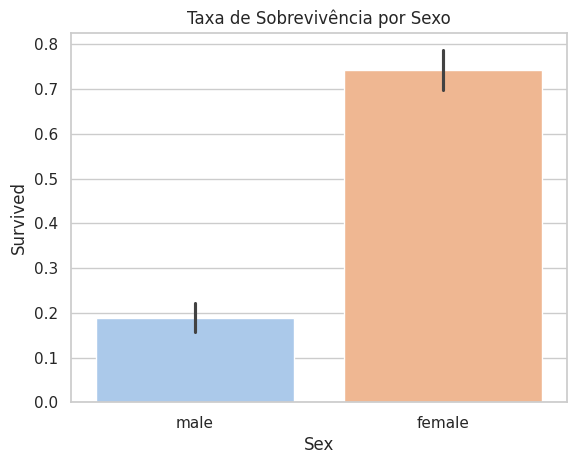

In [10]:
# Visualizando taxa de sobrevivência por categorias

# Taxa de sobrevivência por categoria: Sexo

sns.barplot(x="Sex", y="Survived", data=train_data, hue="Sex", palette="pastel", legend=False)
plt.title("Taxa de Sobrevivência por Sexo")
plt.show()

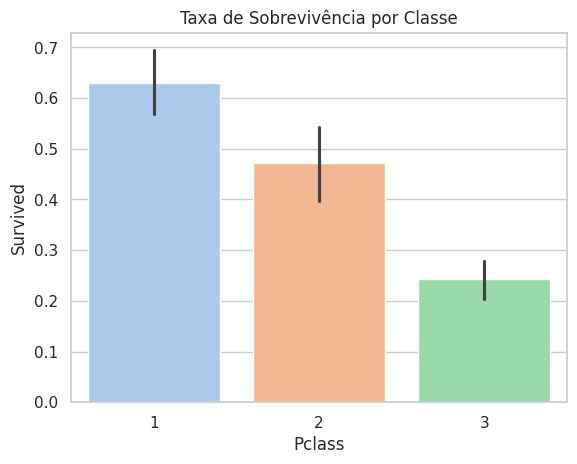

In [11]:
# Taxa de sobrevivência por categoria: Classe Socioeconômica

sns.barplot(x="Pclass", y="Survived", data=train_data, hue="Pclass", palette="pastel", legend=False)
plt.title("Taxa de Sobrevivência por Classe")
plt.show()

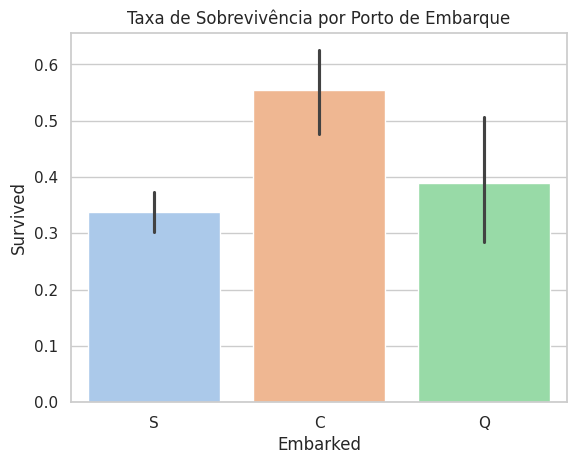

In [12]:
# Taxa de sobrevivência por categoria: Porto de Embarque

sns.barplot(x="Embarked", y="Survived", data=train_data, hue="Embarked", palette="pastel", legend=False)
plt.title("Taxa de Sobrevivência por Porto de Embarque")
plt.show()

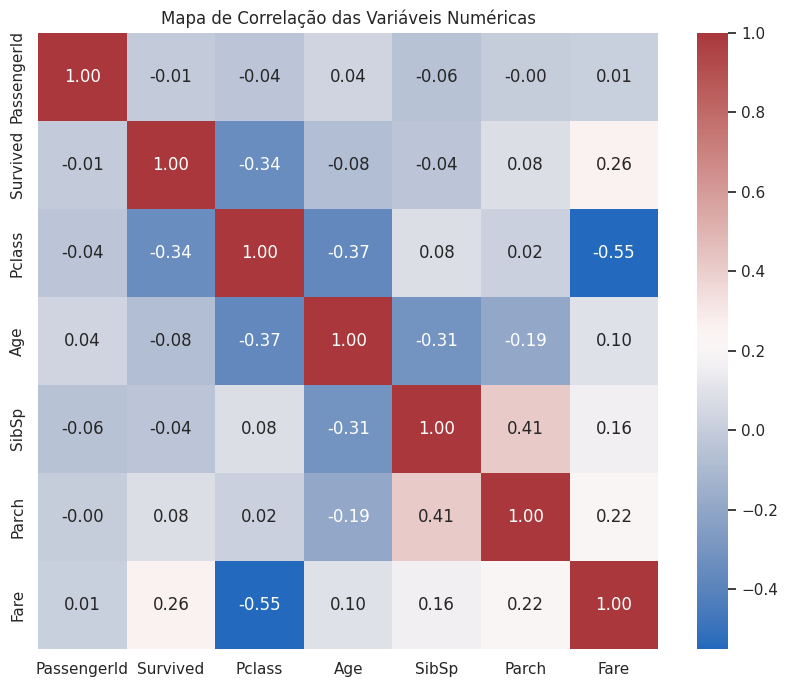

In [13]:
# Correlação entre variáveis

plt.figure(figsize=(10,8))
corr = train_data.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="vlag", fmt=".2f")
plt.title("Mapa de Correlação das Variáveis Numéricas")
plt.show()

In [14]:
# Interpretação das principais correlações

#- Survived & Pclass: Passageiros de classes mais baixas (3ª classe) tiveram menor taxa de sobrevivência.

train_data.groupby("Pclass")["Survived"].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [15]:
#- Survived & Fare: Quem pagou tarifas mais altas teve maior chance de sobreviver.

train_data[['Fare', 'Survived']].groupby(pd.qcut(train_data['Fare'], 5), observed=False).mean()

,Fare,Survived
Fare,,
"(-0.001, 7.854]",6.822908,0.217877
"(7.854, 10.5]",8.623997,0.201087
"(10.5, 21.679]",15.215019,0.424419
"(21.679, 39.688]",28.922592,0.444444
"(39.688, 512.329]",102.629451,0.642045


In [16]:
#- Pclass & Fare: Forte relação: quanto menor a classe (1ª), maior a tarifa.
train_data.groupby("Pclass")["Fare"].mean()

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

In [17]:
# - Age & Pclass: Passageiros da 1ª classe tendem a ser mais velhos
train_data.groupby("Pclass")["Age"].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [18]:
# - SibSp & Parch: Ter irmãos/cônjuges a bordo se relaciona com ter pais/filhos também — famílias viajando juntas.
train_data[["SibSp", "Parch"]].corr()

,SibSp,Parch
SibSp,1.000000,0.414838
Parch,0.414838,1.000000


In [19]:
# - Survived & Age: Leve tendência: passageiros mais velhos sobreviveram menos, mas correlação fraca.
train_data.groupby(pd.cut(train_data["Age"], bins=[0,12,18,40,60,80]), observed=False)["Survived"].mean()

Age
(0, 12]     0.579710
(12, 18]    0.428571
(18, 40]    0.388235
(40, 60]    0.390625
(60, 80]    0.227273
Name: Survived, dtype: float64

In [20]:
# Criação da feature FamilySize
train_data["FamilySize"] = train_data["SibSp"] + train_data["Parch"] + 1
test_data["FamilySize"] = test_data["SibSp"] + test_data["Parch"] + 1

# Verificação
train_data[["SibSp", "Parch", "FamilySize"]].head(10)

,SibSp,Parch,FamilySize
0,1,0,2
1,1,0,2
2,0,0,1
3,1,0,2
4,0,0,1
5,0,0,1
6,0,0,1
7,3,1,5
8,0,2,3
9,1,0,2


In [21]:
# Taxa de sobrevivência por categoria: Tamanho da Família
train_data.groupby("FamilySize")["Survived"].mean()

FamilySize
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64

<Axes: xlabel='FamilySize', ylabel='Survived'>

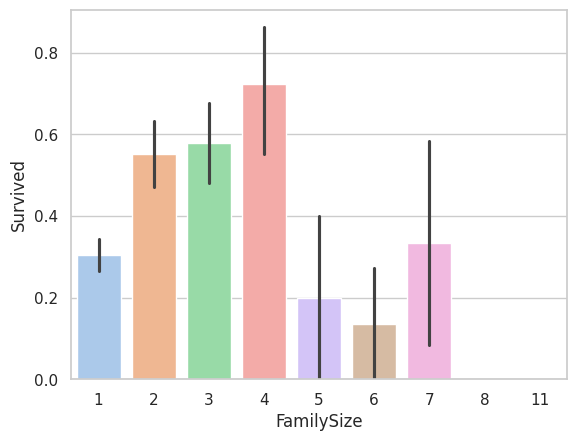

In [22]:
# Gráfico de Distribuição: Tamanho da Família

sns.barplot(x="FamilySize", y="Survived", data=train_data, hue="FamilySize", palette="pastel", legend=False)

In [23]:
# Interpretação FamilySize
#- FamilySize = 1 (sozinhos): sobrevivência baixa (~30%).
#- FamilySize = 2–4 (famílias pequenas): sobrevivência alta (55%–72%).
#- FamilySize ≥ 5 (famílias grandes): sobrevivência despenca (20% ou menos).
#- FamilySize = 8 ou 11: nenhum sobrevivente registrado.

In [24]:
# Identificando valores ausentes 'train_data'
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
FamilySize       0
dtype: int64

In [25]:
# Identificando valores ausentes 'test_data'
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
FamilySize       0
dtype: int64

In [26]:
# Tratando valores ausentes: Idade

# Método: Imputar valores com mediana
# Justificativa: A idade é uma variável importante para prever sobrevivência. Utilizar a mediana por grupos (Pclass + Sex) é mais complexo do que utilizar a média geral, visto que passageiros da 1ª classe tendem a ser mais velhos e mulheres/crianças têm idades diferentes dos homens. 

train_data["Age"] = train_data["Age"].fillna(
    train_data.groupby(["Pclass", "Sex"])["Age"].transform("median")
)

test_data["Age"] = test_data["Age"].fillna(
    test_data.groupby(["Pclass", "Sex"])["Age"].transform("median")
)

In [27]:
# Tratando valores ausentes: Cabine

# Justificativa: Contém muitos valores ausentes (~80%), imputar valores seria pouco confiável, portanto remover a coluna é mais seguro. A informação de cabine está fortemente ligada à classe (1ª classe tinha cabine registrada, 3ª classe quase nunca), a variável Pclass serviá para as análises.

train_data.drop("Cabin", axis=1, inplace=True)
test_data.drop("Cabin", axis=1, inplace=True)

In [28]:
# Tratando valores ausentes: Tarifa

#Justificativa: Há apenas 1 valor ausente, utilizar a mediana evita distorções causadas por outliers (tarifas muito altas)


test_data["Fare"] = test_data["Fare"].fillna(test_data["Fare"].median())

In [29]:
# Tratando valores ausentes: Porto de Embarque

# Justificativa: Apenas 2 valores estão ausentes, preencher com a moda é simples e eficaz.

train_data["Embarked"] = train_data["Embarked"].fillna(train_data["Embarked"].mode()[0])

In [30]:
# Verificando valores ausentes após tratamentos

print("Valores ausentes no train_data:")
print(train_data.isnull().sum())

print("\nValores ausentes no test_data:")
print(test_data.isnull().sum())

Valores ausentes no train_data:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
FamilySize     0
dtype: int64

Valores ausentes no test_data:
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
FamilySize     0
dtype: int64


In [31]:
# Codificação da coluna Sex
train_data = pd.get_dummies(train_data, columns=["Sex"], drop_first=True)
test_data = pd.get_dummies(test_data, columns=["Sex"], drop_first=True)

# Conferindo resultado
print(train_data[["Sex_male"]].head())

   Sex_male
0      True
1     False
2     False
3     False
4      True


In [32]:
# Legendas

# - Sex_male = 1 → passageiro é homem
# - Sex_male = 0 → passageiro é mulher


In [33]:
# Codificação da coluna Embarked
train_data = pd.get_dummies(train_data, columns=["Embarked"], drop_first=True)
test_data = pd.get_dummies(test_data, columns=["Embarked"], drop_first=True)

# Conferindo resultado
print(train_data[["Embarked_S", "Embarked_Q"]].head())

   Embarked_S  Embarked_Q
0        True       False
1       False       False
2        True       False
3        True       False
4        True       False


In [34]:
# Legendas

# - Embarked_S = 1 → embarcou em Southampton
# - Embarked_Q = 1 → embarcou em Queenstown
# - Se ambos forem 0 → embarcou em Cherbourg

In [35]:
# Extraindo o título da coluna Name

train_data["Title"] = train_data["Name"].str.extract(r',\s*([^\.]*)\s*\.', expand=False)
test_data["Title"] = test_data["Name"].str.extract(r',\s*([^\.]*)\s*\.', expand=False)

In [36]:
# Transformando títulos em colunas binárias
train_data = pd.get_dummies(train_data, columns=["Title"], drop_first=True)
test_data = pd.get_dummies(test_data, columns=["Title"], drop_first=True)

In [37]:
# Criando a coluna Title a partir da coluna Name
train_data["Title"] = train_data["Name"].str.extract(r',\s*([^\.]*)\s*\.', expand=False)
test_data["Title"] = test_data["Name"].str.extract(r',\s*([^\.]*)\s*\.', expand=False)

In [38]:
# Visualizando a nova coluna
print(train_data[["Name", "Title"]].head(10))

                                                Name   Title
0                            Braund, Mr. Owen Harris      Mr
1  Cumings, Mrs. John Bradley (Florence Briggs Th...     Mrs
2                             Heikkinen, Miss. Laina    Miss
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)     Mrs
4                           Allen, Mr. William Henry      Mr
5                                   Moran, Mr. James      Mr
6                            McCarthy, Mr. Timothy J      Mr
7                     Palsson, Master. Gosta Leonard  Master
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)     Mrs
9                Nasser, Mrs. Nicholas (Adele Achem)     Mrs


In [39]:
# Legendas

# - Crianças → Master.
# - Mulheres solteiras → Miss.
# - Mulheres casadas → Mrs.
# - Homens → Mr.
# - Títulos raros (Lady, Countess, Capt" → Rare.


In [40]:
# Verificando títulos únicos

print(train_data["Title"].unique())

['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'the Countess' 'Jonkheer']


In [41]:
# Conferindo a frequência
print(train_data["Title"].value_counts())

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Mlle              2
Major             2
Ms                1
Mme               1
Don               1
Lady              1
Sir               1
Capt              1
the Countess      1
Jonkheer          1
Name: count, dtype: int64


In [42]:
# Definindo títulos raros

rare_titles = ["Lady", "Countess", "Capt", "Col", "Don", "Dr", 
               "Major", "Rev", "Sir", "Jonkheer", "Dona"]

train_data["Title"] = train_data["Title"].replace(rare_titles, "Rare")
test_data["Title"] = test_data["Title"].replace(rare_titles, "Rare")

In [43]:
# Normalizando equivalentes

train_data["Title"] = train_data["Title"].replace({"Mlle": "Miss", "Ms": "Miss", "Mme": "Mrs"})
test_data["Title"] = test_data["Title"].replace({"Mlle": "Miss", "Ms": "Miss", "Mme": "Mrs"})

In [44]:
# Conferindo o resultado
print(train_data["Title"].value_counts())

Title
Mr              517
Miss            185
Mrs             126
Master           40
Rare             22
the Countess      1
Name: count, dtype: int64


In [45]:
# Codificação da coluna Title
train_data = pd.get_dummies(train_data, columns=["Title"], drop_first=True)
test_data = pd.get_dummies(test_data, columns=["Title"], drop_first=True)

# Conferindo resultado
print(train_data.filter(like="Title").head())

   Title_Col  Title_Don  Title_Dr  Title_Jonkheer  Title_Lady  Title_Major  \
0      False      False     False           False       False        False   
1      False      False     False           False       False        False   
2      False      False     False           False       False        False   
3      False      False     False           False       False        False   
4      False      False     False           False       False        False   

   Title_Master  Title_Miss  Title_Mlle  Title_Mme  ...  Title_Mrs  Title_Ms  \
0         False       False       False      False  ...      False     False   
1         False       False       False      False  ...       True     False   
2         False        True       False      False  ...      False     False   
3         False       False       False      False  ...       True     False   
4         False       False       False      False  ...      False     False   

   Title_Rev  Title_Sir  Title_the Countess  Title

In [46]:
#  Features (X) e Target (y)

# Definindo o alvo (y)
y = train_data["Survived"]

# O alvo é a coluna Survived, que indica se o passageiro sobreviveu ou não.


In [47]:
# Definindo as features (X)
X = train_data.drop(["Survived", "PassengerId", "Name", "Ticket"], axis=1)

# Removemos apenas colunas que não ajudam o modelo (PassengerId, Name, Ticket

In [48]:
# Conferindo o resultado

print(X.head())
print(y.head())


   Pclass   Age  SibSp  Parch     Fare  FamilySize  Sex_male  Embarked_Q  \
0       3  22.0      1      0   7.2500           2      True       False   
1       1  38.0      1      0  71.2833           2     False       False   
2       3  26.0      0      0   7.9250           1     False       False   
3       1  35.0      1      0  53.1000           2     False       False   
4       3  35.0      0      0   8.0500           1      True       False   

   Embarked_S  Title_Col  ...  Title_Mrs  Title_Ms  Title_Rev  Title_Sir  \
0        True      False  ...      False     False      False      False   
1       False      False  ...       True     False      False      False   
2        True      False  ...      False     False      False      False   
3        True      False  ...       True     False      False      False   
4        True      False  ...      False     False      False      False   

   Title_the Countess  Title_Miss  Title_Mr  Title_Mrs  Title_Rare  \
0               

In [49]:
# Modelo de Machine Learning: Logistic Regression

# Importando bibliotecas
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [50]:
# Divindo os dados em treino e validação

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# - 80%: treino
# - 20%: validação


In [51]:
# Criando o modelo
model = LogisticRegression(max_iter=1000)

# Treinando o modelo
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [52]:
# Fazendo previsões
y_pred = model.predict(X_val)


In [53]:
# Avaliando o modelo

print("Acurácia:", accuracy_score(y_val, y_pred))
print("Matriz de confusão:\n", confusion_matrix(y_val, y_pred))
print("Relatório de classificação:\n", classification_report(y_val, y_pred))

Acurácia: 0.8156424581005587
Matriz de confusão:
 [[88 17]
 [16 58]]
Relatório de classificação:
               precision    recall  f1-score   support

           0       0.85      0.84      0.84       105
           1       0.77      0.78      0.78        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



In [54]:
# Modelo de Machine Learning: XGBoost

# Importando bibliotecas
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [55]:
# Criando o modelo
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    random_state=42,
    eval_metric="logloss",
    tree_method="hist"  # ou "approx"
)


# Treinando o modelo
xgb_model.fit(X_train.values, y_train.values)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [56]:
# Fazendo previsões
y_pred_xgb = xgb_model.predict(X_val.values)

In [57]:
# Avaliando o modelo
print("Acurácia XGB:", accuracy_score(y_val, y_pred_xgb))
print("Matriz de confusão:\n", confusion_matrix(y_val, y_pred_xgb))
print("Relatório de classificação:\n", classification_report(y_val, y_pred_xgb))


Acurácia XGB: 0.8268156424581006
Matriz de confusão:
 [[91 14]
 [17 57]]
Relatório de classificação:
               precision    recall  f1-score   support

           0       0.84      0.87      0.85       105
           1       0.80      0.77      0.79        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



In [58]:
# Avaliando modelos

# Guardando métricas principais
results = {
    "Logistic Regression": {
        "accuracy": 0.8156,  # substitua pelo valor real do seu output
        "precision_class_0": 0.85,
        "recall_class_0": 0.84,
        "precision_class_1": 0.77,
        "recall_class_1": 0.78
    },
    "XGBoost": {
        "accuracy": 0.8268,  # substitua pelo valor real do seu output
        "precision_class_0": 0.84,
        "recall_class_0": 0.87,
        "precision_class_1": 0.80,
        "recall_class_1": 0.77
    }
}

In [59]:
# Exibindo comparação
import pandas as pd
comparison = pd.DataFrame(results).T
print(comparison)


                     accuracy  precision_class_0  recall_class_0  \
Logistic Regression    0.8156               0.85            0.84   
XGBoost                0.8268               0.84            0.87   

                     precision_class_1  recall_class_1  
Logistic Regression               0.77            0.78  
XGBoost                           0.80            0.77  


In [60]:
# Interpretando a comparação

#- Acurácia geral: XGBoost teve desempenho ligeiramente melhor.
#- Classe 0 (não sobreviveu): XGBoost teve recall maior (acerta mais quem não sobreviveu).
#- Classe 1 (sobreviveu): Regressão Logística teve recall um pouco maior (acerta mais sobreviventes).

In [61]:
# Ensemble: Importando classe
from sklearn.ensemble import VotingClassifier


In [62]:
# Convertendo para NumPy antes de treinar o ensemble
ensemble_model.fit(X_train.values, y_train.values)

NameError: name 'ensemble_model' is not defined

In [ ]:
# Recriando os modelos
logreg_model = LogisticRegression(max_iter=1000, random_state=42)
xgb_model = XGBClassifier(random_state=42, eval_metric="logloss", tree_method="hist")


In [ ]:
# Criando ensemble 
ensemble_model = VotingClassifier(
    estimators=[("logreg", logreg_model), ("xgb", xgb_model)],
    voting="soft"
)

In [ ]:
# Treinando ensemble
ensemble_model.fit(X_train.values, y_train.values)


In [ ]:
# Avaliando o desempenho
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred_ensemble = ensemble_model.predict(X_val.values)

print("Acurácia Ensemble:", accuracy_score(y_val, y_pred_ensemble))
print("Matriz de confusão:\n", confusion_matrix(y_val, y_pred_ensemble))
print("Relatório de classificação:\n", classification_report(y_val, y_pred_ensemble))


In [ ]:
# Interpretando o resultado do ensemble
#- Acurácia: ~83% → manteve o nível do XGBoost.
#- Classe 0 (não sobreviveu): recall 0.88 → o ensemble acertou ainda mais quem não sobreviveu.
#- Classe 1 (sobreviveu): recall 0.76 → ficou um pouco abaixo da regressão logística (0.78) e do XGBoost (0.77).

In [ ]:
# Fase Final: Previsões com XGBoost

# Após comparar Logistic Regression (~82% de acurácia), XGBoost (~83%) e Ensemble (~83%), optei por utilizar o **XGBoost** como modelo final. Ele apresentou melhor acurácia geral, boa estabilidade e é amplamente reconhecido em aplicações reais de Machine Learning. 


In [ ]:
# Treinamento XGBoost
xgb_model.fit(X_train.values, y_train.values)

In [ ]:
# Importação das funções
from xgboost import plot_importance
import matplotlib.pyplot as plt

# Plotando as 10 features mais importantes
plot_importance(xgb_model, max_num_features=10)
plt.title("Top 10 Features - XGBoost")
plt.show()


In [ ]:
# Gráfico de avaliação: Matriz de Confusão
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_val, y_pred_xgb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Matriz de Confusão - XGBoost")
plt.show()


In [ ]:
# Interpretando Matriz de Confusão
#- O modelo é forte em identificar quem não sobreviveu (91 acertos contra apenas 14 erros).
#- Ele ainda perde alguns sobreviventes (17 falsos negativos), mostrando que é mais conservador e tende a prever “não sobreviveu” com mais confiança.
#- A acurácia geral é de aproximadamente 83%, consistente com suas métricas anteriores.

In [ ]:
# Importação das funções
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Probabilidades de sobrevivência (classe 1)
y_proba = xgb_model.predict_proba(X_val.values)[:, 1]

# Calcular pontos da curva ROC
fpr, tpr, _ = roc_curve(y_val, y_proba)
roc_auc = auc(fpr, tpr)

# Plotar curva ROC
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color="blue", label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1], [0,1], "--", color="gray")  # linha de referência
plt.xlabel("Taxa de Falsos Positivos")
plt.ylabel("Taxa de Verdadeiros Positivos")
plt.title("Curva ROC - XGBoost")
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Interpretando Gráfico
#- AUC = 0.91 → excelente desempenho. Isso significa que o modelo tem 91% de chance de distinguir corretamente entre sobreviventes e não sobreviventes.
#- A curva azul está bem acima da diagonal → mostra que o modelo é muito melhor que o acaso.
#- Quanto mais próximo de 1 o AUC, melhor a separação entre classes. Valores acima de 0.9 são considerados fortes em classificação binária.

In [ ]:
# Conclusão do modelo

#=O XGBoost não só teve boa acurácia (~83%), como também apresentou uma capacidade muito alta de discriminar as classes (AUC = 0.91), reforçando a minha escolha como modelo final para submissão.


In [ ]:
# Preparando dados para submissão
# Removendo colunas duplicadas em treino e teste
train_data = train_data.loc[:, ~train_data.columns.duplicated()]
test_data  = test_data.loc[:, ~test_data.columns.duplicated()]

In [ ]:
# Concatenando para aplicar get_dummies de uma vez
full_data = pd.concat([train_data.drop("Survived", axis=1), test_data], axis=0)

In [ ]:
# Aplicando get_dummies
full_data = pd.get_dummies(full_data, drop_first=True)

In [ ]:
# Separando novamente
X_train = full_data.iloc[:len(train_data), :]
X_test  = full_data.iloc[len(train_data):, :]
y_train = train_data["Survived"]

In [ ]:
# Treinando o modelo
xgb_model.fit(X_train.values, y_train.values)
xgb_predictions = xgb_model.predict(X_test.values)

In [ ]:
# Gerando submissão
submission_xgb = pd.DataFrame({
    "PassengerId": test_data["PassengerId"],
    "Survived": xgb_predictions
})
submission_xgb.to_csv("submission_xgb.csv", index=False)